### Classification

Classification is a machine learning task where the goal is to categorize input data into predefined classes or categories based on their features.

1. Image Classification: Recognizing objects in pictures, like cars or animals.
2. Audio Classification: Turning spoken words into text.
3. Text Classification: Sorting documents into topics, good for sentiment analysis.
4. Medical Imaging: Spotting health issues in images, such as tumors in scans, aiding doctors in diagnosing illnesses.
5. Environmental Sound Classification: Identifying sounds like sirens or birdsong, handy for monitoring wildlife or home security systems.

### What is Accuracy?

- It is a performance metric commonly used in machine learning to assess the effectiveness of a predictive model.
- Accuracy is calculated as the number of correct predictions divided by the total number of predictions made, expressed as a percentage.


$$ \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} \times 100\% $$



---




**Scenario:** Imagine we are designing a binary classifier, which will predict if an image is of a dog or a cat


We have two models XYZ and ABC.

- **What does it mean when we say model has 90% accuracy?**



```
 When a model has 90% accuracy, it means that it correctly predicts the outcome of the target variable 90% of the time.
 In other words, out of 100 predictions made by the model, it is correct 90 times.
 ```


- **What can we infer about the dataset when we say we have 90% accuracy?**

```
Just knowing the accuracy we cannot infer anything about the contents of a dataset.
```
- **Imagine XYZ has accuracy of 90% and there is ABC model with 84% accuracy can we say which model is better?**

```
Without knowing the dataset on which these accuracy measures are got, it is not the right way to come to a conclusion which model is
better than the other.
```

- **Is there a scenario where the accuracy metric might fail?**

```
Imagine a dataset having 90 dog images and 10 cat images.
  - Model XYZ is hardcoded to output dog for any image. Hence it has 90% accuracy as the dataset has 90 dogs and it misclassifies all
  the cat.
  - Model ABC is trained on images and was able to predict most of the dogs and cat correctly except 16 images.

Based on above two statements don't you think ABC is better as it can work better in real-time and XYZ is just a hardcoded
returning dog each time.

We call such dataset as imbalanced dataset as we have 90 dog and 10 cat(9:1).
```

- **Can you come up with a real-life scenarion where such instance might occur?**

```
Imagine a scenario where we are training to detect cancerous cells. As these are rare we would have an imbalanced dataset with
more cells being non cancerous. So if we go by accuracy this might lead us to miss lot of Cancerous cells during predicition.
This would cause more harm than be useful.
```



- **Is accuracy alone a good metric?**

```
Hence accuracy alone is not a good metric. Things that we need to check along with accuracy are
- Dataset, check if the dataset is balanced, if not take appropriate stepss during training to accomodate for that.
  - Dataset Balancing : Drop data from the larger classs.
  - Weighted Loss Functions : Model pays more attention to less common classes during training, helping it learn better from
   all types of examples in the dataset.
  - Using appropropriate metrics while evaluating the model.
  - Data Augmentation : Altering the existing data with techniques like rotating, flipping, or adding noise to create new examples,
   thereby diversifying the dataset and helping the model generalize better.
```





---



### Code walk : Scenario where accuracy might fail and how other metrics we can use

#### Loading Dataset

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('tempunbalanced.csv')

In [ ]:
df.head()

,Image_Name,Actual Prediction,XYZ Model Prediction,ABC Model Prediction,ABC Correct,XYZ Correct
0,Dog0,Dog,Dog,Dog,True,True
1,Dog1,Dog,Dog,Dog,True,True
2,Dog2,Dog,Dog,Dog,True,True
3,Dog3,Dog,Dog,Dog,True,True
4,Dog4,Dog,Dog,Dog,True,True


#### Count of Individual Dog and Cat Labels

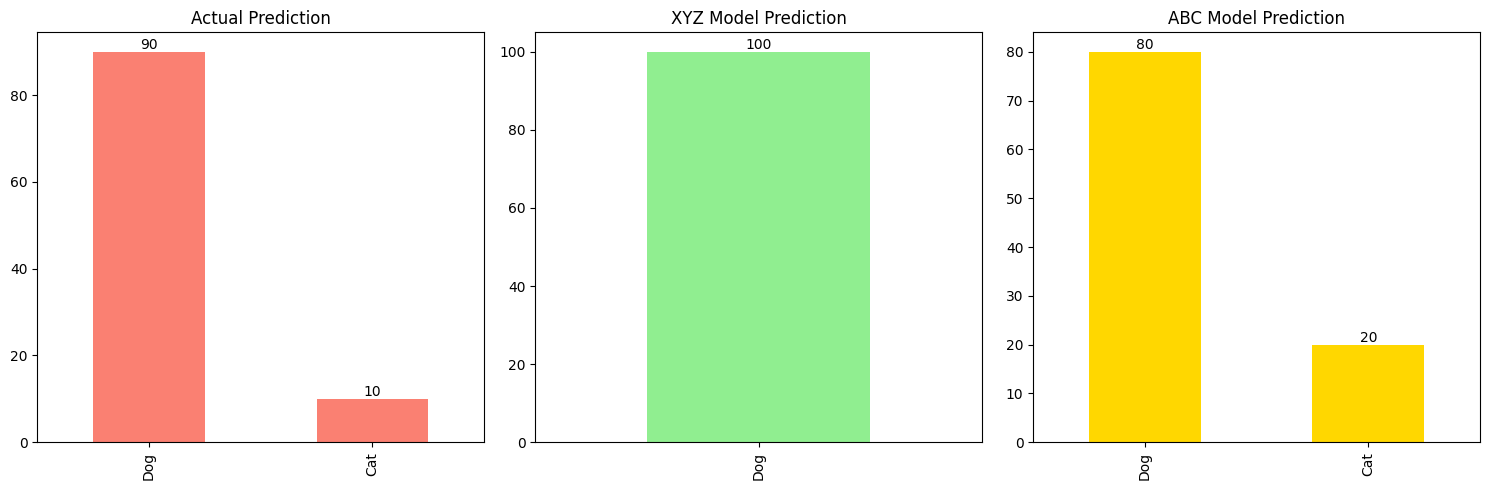

In [ ]:
# Count occurrences of 'dog' and 'cat' in each column
counts_actual_prediction = df['Actual Prediction'].value_counts()
counts_xyz_prediction = df['XYZ Model Prediction'].value_counts()
counts_abc_prediction = df['ABC Model Prediction'].value_counts()

# Create bar plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

counts_actual_prediction.plot(kind='bar', ax=axs[0], color='salmon')
axs[0].set_title('Actual Prediction')
for i, v in enumerate(counts_actual_prediction):
    axs[0].text(i, v, str(v), ha='center', va='bottom')

counts_xyz_prediction.plot(kind='bar', ax=axs[1], color='lightgreen')
axs[1].set_title('XYZ Model Prediction')
for i, v in enumerate(counts_xyz_prediction):
    axs[1].text(i, v, str(v), ha='center', va='bottom')

counts_abc_prediction.plot(kind='bar', ax=axs[2], color='gold')
axs[2].set_title('ABC Model Prediction')
for i, v in enumerate(counts_abc_prediction):
    axs[2].text(i, v, str(v), ha='center', va='bottom')

# Show the plots
plt.tight_layout()
plt.show()

#### Count of Correct Labelling of Cat and Dog for ABC and XYZ models

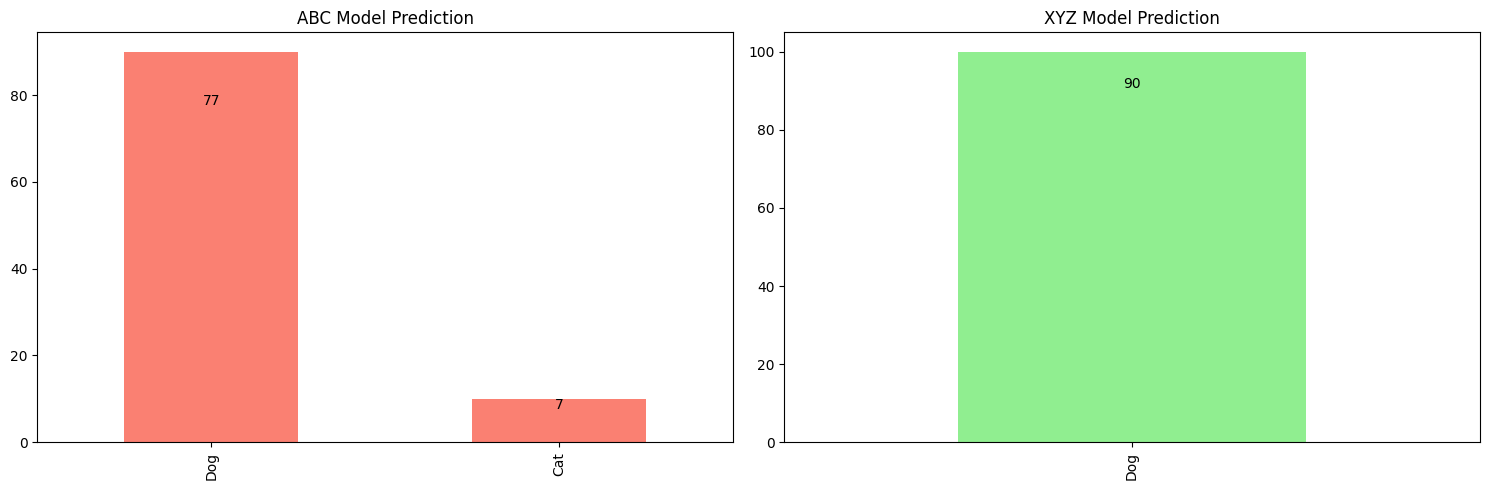

In [ ]:
# Create a new column in the dataframe to indicate if the ABC Model's prediction is correct
df['ABC Correct'] = df['ABC Model Prediction'] == df['Actual Prediction']
df['XYZ Correct'] = df['XYZ Model Prediction'] == df['Actual Prediction']

# Count the number of correct predictions for 'Dog' and 'Cat' by the ABC Model
correct_counts_abc = df[df['ABC Correct']]['ABC Model Prediction'].value_counts()
correct_counts_xyz = df[df['XYZ Correct']]['XYZ Model Prediction'].value_counts()

# Create a bar plot for the correct predictions by the ABC Model
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

counts_actual_prediction.plot(kind='bar', ax=axs[0], color='salmon')
axs[0].set_title('ABC Model Prediction')
for i, v in enumerate(correct_counts_abc):
    axs[0].text(i, v, str(v), ha='center', va='bottom')

counts_xyz_prediction.plot(kind='bar', ax=axs[1], color='lightgreen')
axs[1].set_title('XYZ Model Prediction')
for i, v in enumerate(correct_counts_xyz):
    axs[1].text(i, v, str(v), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


#### Better Visualization : Confusion Matrix

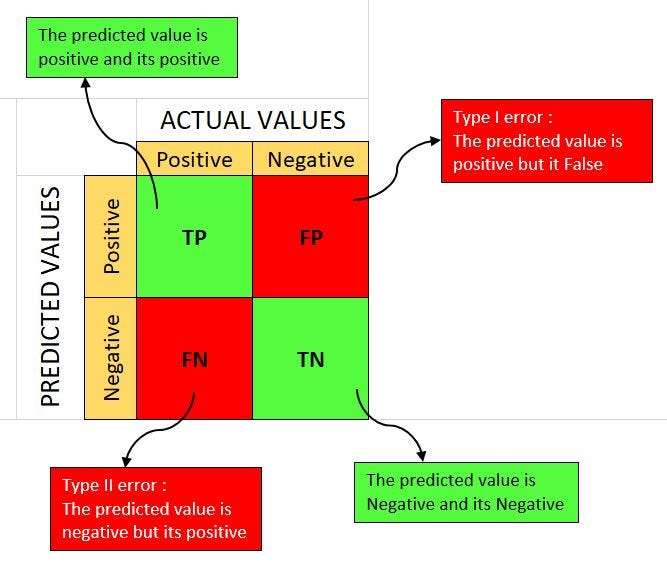

In [ ]:
from IPython.display import Image
Image(filename='cm.jpeg')

In [ ]:
def draw_confusion_matrix(act, pred):
  # Calculate the confusion matrix
  cm = confusion_matrix(act, pred, labels=['Dog', 'Cat'])

  # Create a DataFrame from the confusion matrix
  cm_df = pd.DataFrame(cm, index=['Dog', 'Cat'], columns=['Dog', 'Cat'])

  # Create a heatmap from the DataFrame
  plt.figure(figsize=(7, 5))
  sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
  plt.title('Confusion Matrix for XYZ Model')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()


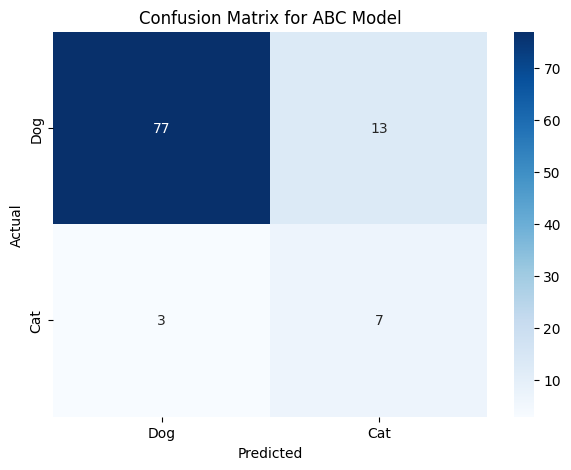

In [ ]:
draw_confusion_matrix(df['Actual Prediction'], df['ABC Model Prediction'])

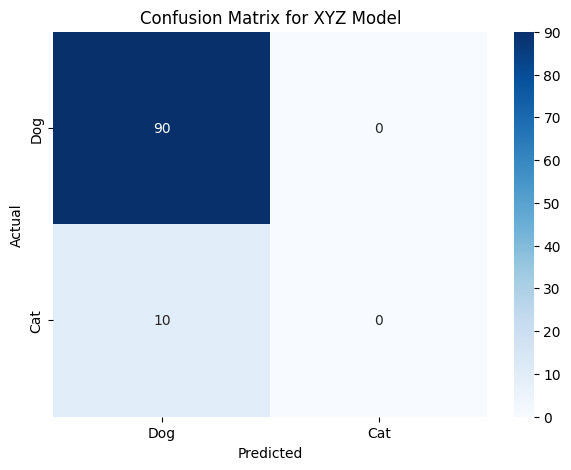

In [ ]:
draw_confusion_matrix(df['Actual Prediction'], df['XYZ Model Prediction'])

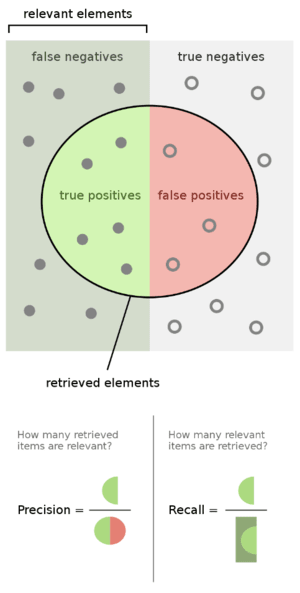

In [ ]:
Image(filename='tt.png')

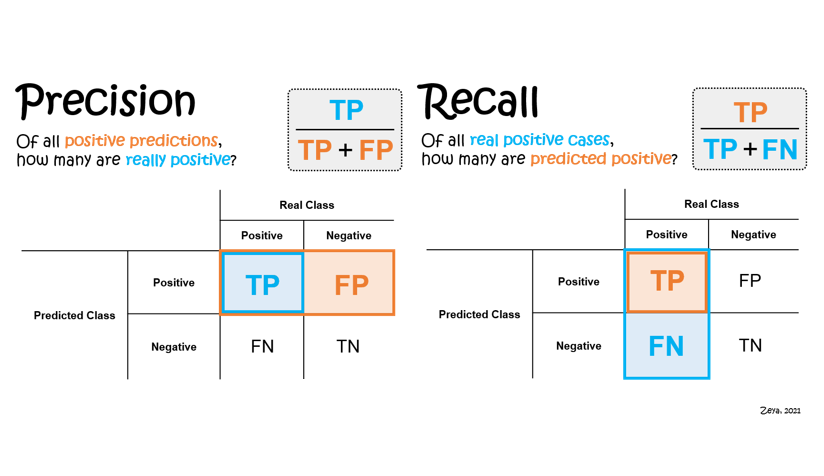

In [ ]:
from IPython.display import Image
Image(filename='cm.png')

F1 score is a metric that combines the Precision and Recall and gives us an idea, but similar to accuracy if the class is imbalanced we have weighted F1 score

The F1 score is the harmonic mean of precision and recall, providing a single score that balances both precision and recall:

�
1
=
2
×
Precision
×
Recall
Precision
+
Recall
F1=2×
Precision+Recall
Precision×Recall
​




In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
def get_metrics(act, pred, labels):
    for label in labels:
        precision_value = precision_score(act, pred, pos_label=label)
        recall_value = recall_score(act, pred, pos_label=label)

        # Print the results for the current label
        print("Label:", label)
        print("Precision:", precision_value)
        print("Recall:", recall_value)
        print()

    f1_value = f1_score(act, pred, pos_label='dog', average='micro')
    weighted_f1_value = f1_score(act, pred,average='weighted')
    print("F1 score:", f1_value)
    print("Weighted F1 score:", weighted_f1_value)
    print()

In [ ]:
get_metrics(df['Actual Prediction'], df['ABC Model Prediction'], ['Dog', 'Cat'])

Label: Dog
Precision: 0.9625
Recall: 0.8555555555555555

Label: Cat
Precision: 0.35
Recall: 0.7

F1 score: 0.8399999999999999
Weighted F1 score: 0.8619607843137254



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'dog') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
get_metrics(df['Actual Prediction'], df['XYZ Model Prediction'], ['Dog', 'Cat'])

Label: Dog
Precision: 0.9
Recall: 1.0

Label: Cat
Precision: 0.0
Recall: 0.0

F1 score: 0.9
Weighted F1 score: 0.8526315789473685



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'dog') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
